In [1]:
# importing libraries
import numpy as np
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying the path and file name
file = "./birthweight_low.xlsx"


# reading the file into Python
birthweight = pd.read_excel(io = file)


# checking the file
birthweight.head(n = 5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,23,11.0,4,11.0,46,12.0,8,9,13,4,0,0,0,1,0,1,0,3600
1,23,16.0,3,10.0,50,12.0,3,8,1,1,1,0,1,0,0,1,0,3912
2,24,16.0,1,12.0,26,16.0,6,9,21,4,0,0,0,1,0,0,1,3090
3,25,14.0,3,12.0,33,12.0,9,9,12,7,1,0,1,0,0,1,0,3370
4,25,12.0,2,8.0,32,12.0,9,9,4,3,0,0,1,0,0,1,0,3827


In [2]:
# taking the birthweight dataset
# and then
# transforming it into boolean based on if a value is null
# and then
# summing together the results per column

birthweight.isnull().sum(axis = 0)

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [3]:
# imputing everything else with the zero

# meduc
fill = 0
birthweight['meduc'] = birthweight['meduc'].fillna(value = fill)

# npvis
fill = 0
birthweight['npvis'] = birthweight['npvis'].fillna(value=fill)

# feduc
fill = 0
birthweight['feduc'] = birthweight['feduc'].fillna(value=fill)


In [4]:
# making sure all missing values have been taken care of
birthweight.isnull().any(axis=0)

mage      False
meduc     False
monpre    False
npvis     False
fage      False
feduc     False
omaps     False
fmaps     False
cigs      False
drink     False
male      False
mwhte     False
mblck     False
moth      False
fwhte     False
fblck     False
foth      False
bwght     False
dtype: bool

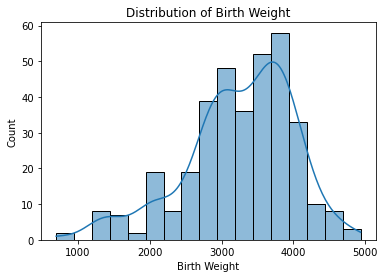

In [5]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'bwght',
          kde    = True)


# title and axis labels
plt.title(label   = "Distribution of Birth Weight")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [6]:
# log transforming bwght and saving it to the dataset
birthweight['log_bwght'] = np.log(birthweight['bwght'])

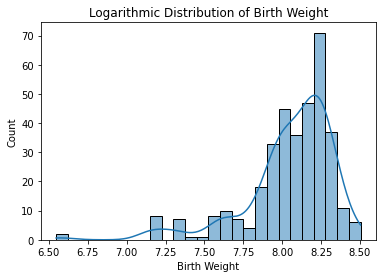

In [7]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'log_bwght',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Birth Weight")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [8]:
# creating a (Pearson) correlation matrix
df_corr = birthweight.corr().round(2)


# printing (Pearson) correlations with Birth Weight
print(df_corr.loc['bwght'].sort_values(ascending = False))

bwght        1.00
log_bwght    0.97
fmaps        0.46
omaps        0.45
npvis        0.28
meduc        0.21
feduc        0.19
moth         0.10
foth         0.05
mblck        0.04
fblck        0.03
monpre       0.02
male         0.02
fwhte       -0.07
mwhte       -0.14
mage        -0.48
cigs        -0.57
fage        -0.58
drink       -0.67
Name: bwght, dtype: float64


In [9]:
# bivariate combinations- creating new bivariate feature terms and saving it to the dataset

# creating new bivariate feature between mother's age and father's age
birthweight['mage_fage'] = birthweight['mage'] * birthweight['fage']  

# creating new bivariate feature between mother's education and father's education
birthweight['meduc_feduc'] = birthweight['meduc'] * birthweight['feduc']

# creating new bivariate feature between average cigarettes per day and average drinks per week
birthweight['drink_cigs'] = birthweight['drink'] * birthweight['cigs']

# creating new bivariate feature between month prenatal care began and total no of prenatal visits
birthweight['monpre_npvis'] = birthweight['monpre'] * birthweight['npvis']

# creating new bivariate feature between if mother is white and if father is black
birthweight['mwhte_fblck'] = birthweight['mwhte'] * birthweight['fblck']

# creating new bivariate feature between if father is black and if mother is white
birthweight['fblck_mwhte'] = birthweight['fblck'] * birthweight['mwhte']

# creating new bivariate feature between if father is white and mother is white
birthweight['fwhte_mwhte'] = birthweight['fwhte'] * birthweight['mwhte']

# creating new bivariate feature between if father is black and mother is black
birthweight['fblck_mblck'] = birthweight['fblck'] * birthweight['mblck']

# creating new bivariate feature between if father is white and mother is black
birthweight['fwhte_mblck'] = birthweight['fwhte'] * birthweight['mblck']

# creating new bivariate feature between father is other and mother is other
birthweight['foth_moth'] = birthweight['foth'] * birthweight['moth']

# creating new bivariate feature between if father is other and mother is black
birthweight['foth_mblck'] = birthweight['foth'] * birthweight['mblck']

# creating new bivariate feature between mother is other and father is black
birthweight['moth_fblck'] = birthweight['moth'] * birthweight['fblck']

# creating new bivariate feature between if father is other and mother is black
birthweight['foth_mwhte'] = birthweight['foth'] * birthweight['mwhte']

# creating new bivariate feature between father is white and mother is other
birthweight['fwhte_moth'] = birthweight['fwhte'] * birthweight['moth']

In [10]:
# preparing explanatory variable data
birthweight_data   = birthweight.drop(['bwght','fmaps','meduc', 'monpre',
                                    'omaps','log_bwght','male'],
                                        axis = 1)


# preparing response variables
log_birthweight_aim = birthweight.loc[ : , 'log_bwght']

# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split( # take note of this formatting
            birthweight_data, # x_data
            log_birthweight_aim, # y_data
            test_size = 0.25, # size of testing set
            random_state = 219) # lock in of random sequence


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (264, 26)
y-side: (264,)


Testing Data
------------
X-side: (88, 26)
y-side: (88,)



In [11]:
# declaring set of x-variables
x_variables = ['mage', 'feduc','meduc', 'monpre','fage', 'fwhte', 'mwhte', 'npvis', 
               'cigs','drink','male','mblck','moth','fblck','foth','mage_fage', 'drink_cigs', 'fblck_mblck', 'foth_moth', 'foth_mblck', 'moth_fblck', 'fwhte_moth']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

mage +
feduc +
meduc +
monpre +
fage +
fwhte +
mwhte +
npvis +
cigs +
drink +
male +
mblck +
moth +
fblck +
foth +
mage_fage +
drink_cigs +
fblck_mblck +
foth_moth +
foth_mblck +
moth_fblck +
fwhte_moth +


In [12]:
# Removing the fields with greater p-values
# declaring set of x-variables
x_variables = ['mage', 'feduc','fage', 'fwhte', 'mwhte', 'npvis', 
               'cigs','drink','mblck','moth','fblck','foth','mage_fage', 'drink_cigs', 'fblck_mblck', 'foth_moth', 'foth_mblck', 'moth_fblck', 'fwhte_moth']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

mage +
feduc +
fage +
fwhte +
mwhte +
npvis +
cigs +
drink +
mblck +
moth +
fblck +
foth +
mage_fage +
drink_cigs +
fblck_mblck +
foth_moth +
foth_mblck +
moth_fblck +
fwhte_moth +


In [13]:
# building a fit model

# blueprinting a model type
lm_fit = smf.ols(formula = """  log_bwght ~ mage +
                                            feduc +
                                            meduc +
                                            monpre +
                                            fage +
                                            fwhte +
                                            mwhte +
                                            npvis +
                                            cigs +
                                            drink +
                                            male +
                                            mblck +
                                            moth +
                                            fblck +
                                            foth +
                                            mage_fage +
                                            drink_cigs +
                                            fblck_mblck +
                                            foth_moth +
                                            foth_mblck +
                                            moth_fblck +
                                            fwhte_moth""",
                                            data = birthweight)


# telling Python to run the data through the blueprint
results_fit = lm_fit.fit()


# printing the results
results_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_bwght   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     84.81
Date:                Fri, 08 Jul 2022   Prob (F-statistic):          5.60e-110
Time:                        01:20:19   Log-Likelihood:                 233.57
No. Observations:                 352   AIC:                            -431.1
Df Residuals:                     334   BIC:                            -361.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.1960      0.072     58.170      0.000       4.054       4.338
mage            0.0179      0.003      5.872      0.000       0.012       0.024
feduc           0.0105      0.003      3.429      0.001       0.004       0.016
meduc           0.0024      0.003      0.703      0.483      -0.004       0.009
monpre          0.0097      0.022      0.432      0.666      -0.034       0.054
fage            0.0138      0.003      5.084      0.000       0.008       0.019
fwhte           1.7115      0.039     44.261      0.000       1.635       1.788
mwhte           1.4464      0.031     46.129      0.000       1.385       1.508
npvis           0.0037      0.001      3.184      0.002       0.001       0.006
cigs            0.0060      0.002      2.994      0.003       0.002       0.010
drink           0.0189      0.004      4.721      0.000       0.011       0.027
male            0.0136      0.014      0.941      0.347      -0.015       0.042
mblck           1.3988      0.036     38.931      0.000       1.328       1.469
moth            1.3508      0.033     41.366      0.000       1.287       1.415
fblck           1.2082      0.033     36.096      0.000       1.142       1.274
foth            1.2763      0.029     44.045      0.000       1.219       1.333
mage_fage      -0.0004    6.2e-05     -6.968      0.000      -0.001      -0.000
drink_cigs     -0.0035      0.000    -12.231      0.000      -0.004      -0.003
fblck_mblck     0.5509      0.036     15.182      0.000       0.480       0.622
foth_moth       0.5243      0.031     16.726      0.000       0.463       0.586
foth_mblck      0.7520      0.044     17.159      0.000       0.666       0.838
moth_fblck      0.6573      0.054     12.249      0.000       0.552       0.763
fwhte_moth      0.1692      0.038      4.396      0.000       0.094       0.245
==============================================================================
Omnibus:                       44.049   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.698
Skew:                           0.311   Prob(JB):                     1.09e-51
Kurtosis:                       6.952   Cond. No.                     5.34e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.47e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [14]:
# building a fit model with removed fields of p-values > 0.05

# blueprinting a model type
lm_fit = smf.ols(formula = """  log_bwght ~ mage +
                                            feduc +
                                            fage +
                                            fwhte +
                                            mwhte +
                                            npvis +
                                            cigs +
                                            drink +
                                            mblck +
                                            moth +
                                            fblck +
                                            foth +
                                            mage_fage +
                                            drink_cigs +
                                            fblck_mblck +
                                            foth_moth +
                                            foth_mblck +
                                            moth_fblck +
                                            fwhte_moth""",
                                            data = birthweight)


# telling Python to run the data through the blueprint
results_fit = lm_fit.fit()


# printing the results
results_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_bwght   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     103.3
Date:                Fri, 08 Jul 2022   Prob (F-statistic):          1.22e-112
Time:                        01:20:19   Log-Likelihood:                 232.74
No. Observations:                 352   AIC:                            -435.5
Df Residuals:                     337   BIC:                            -377.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.2179      0.067     63.288      0.000       4.087       4.349
mage            0.0179      0.003      5.940      0.000       0.012       0.024
feduc           0.0114      0.003      4.380      0.000       0.006       0.016
fage            0.0142      0.003      5.282      0.000       0.009       0.019
fwhte           1.7246      0.035     49.040      0.000       1.655       1.794
mwhte           1.4481      0.031     46.360      0.000       1.387       1.510
npvis           0.0038      0.001      3.335      0.001       0.002       0.006
cigs            0.0060      0.002      2.967      0.003       0.002       0.010
drink           0.0186      0.004      4.678      0.000       0.011       0.026
mblck           1.4132      0.032     43.771      0.000       1.350       1.477
moth            1.3566      0.031     44.367      0.000       1.296       1.417
fblck           1.2099      0.032     38.355      0.000       1.148       1.272
foth            1.2834      0.028     45.750      0.000       1.228       1.339
mage_fage      -0.0004   6.12e-05     -7.119      0.000      -0.001      -0.000
drink_cigs     -0.0035      0.000    -12.248      0.000      -0.004      -0.003
fblck_mblck     0.5523      0.035     15.705      0.000       0.483       0.621
foth_moth       0.5278      0.031     17.173      0.000       0.467       0.588
foth_mblck      0.7556      0.043     17.636      0.000       0.671       0.840
moth_fblck      0.6576      0.050     13.044      0.000       0.558       0.757
fwhte_moth      0.1712      0.036      4.742      0.000       0.100       0.242
==============================================================================
Omnibus:                       44.749   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.513
Skew:                           0.296   Prob(JB):                     2.42e-55
Kurtosis:                       7.099   Cond. No.                     3.75e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.07e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [15]:
# Playing around with fields with p_values > 0.05

# blueprinting a model type
lm_fit = smf.ols(formula = """  log_bwght ~ mage +
                                            feduc +
                                            fage +
                                            fwhte +
                                            mwhte +
                                            npvis +
                                            cigs +
                                            drink +
                                            mblck +
                                            moth +
                                            fblck +
                                            foth +
                                            mage_fage +
                                            drink_cigs +
                                            fblck_mblck +
                                            foth_moth +
                                            foth_mblck +
                                            moth_fblck +
                                            fwhte_moth""",
                                            data = birthweight)


# telling Python to run the data through the blueprint
results_fit = lm_fit.fit()


# printing the results
results_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_bwght   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     103.3
Date:                Fri, 08 Jul 2022   Prob (F-statistic):          1.22e-112
Time:                        01:20:19   Log-Likelihood:                 232.74
No. Observations:                 352   AIC:                            -435.5
Df Residuals:                     337   BIC:                            -377.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.2179      0.067     63.288      0.000       4.087       4.349
mage            0.0179      0.003      5.940      0.000       0.012       0.024
feduc           0.0114      0.003      4.380      0.000       0.006       0.016
fage            0.0142      0.003      5.282      0.000       0.009       0.019
fwhte           1.7246      0.035     49.040      0.000       1.655       1.794
mwhte           1.4481      0.031     46.360      0.000       1.387       1.510
npvis           0.0038      0.001      3.335      0.001       0.002       0.006
cigs            0.0060      0.002      2.967      0.003       0.002       0.010
drink           0.0186      0.004      4.678      0.000       0.011       0.026
mblck           1.4132      0.032     43.771      0.000       1.350       1.477
moth            1.3566      0.031     44.367      0.000       1.296       1.417
fblck           1.2099      0.032     38.355      0.000       1.148       1.272
foth            1.2834      0.028     45.750      0.000       1.228       1.339
mage_fage      -0.0004   6.12e-05     -7.119      0.000      -0.001      -0.000
drink_cigs     -0.0035      0.000    -12.248      0.000      -0.004      -0.003
fblck_mblck     0.5523      0.035     15.705      0.000       0.483       0.621
foth_moth       0.5278      0.031     17.173      0.000       0.467       0.588
foth_mblck      0.7556      0.043     17.636      0.000       0.671       0.840
moth_fblck      0.6576      0.050     13.044      0.000       0.558       0.757
fwhte_moth      0.1712      0.036      4.742      0.000       0.100       0.242
==============================================================================
Omnibus:                       44.749   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.513
Skew:                           0.296   Prob(JB):                     2.42e-55
Kurtosis:                       7.099   Cond. No.                     3.75e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.07e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [19]:
# merging X_train and y_train so that they can be used in statsmodels
birthweight_train = pd.concat([x_train, y_train], axis = 1)

# Step 1: build a model
lm_best = smf.ols(formula = """  log_bwght ~ mage +
                                            feduc +
                                            fage +
                                            fwhte +
                                            mwhte +
                                            npvis +
                                            cigs +
                                            drink +
                                            mblck +
                                            moth +
                                            fblck +
                                            foth +
                                            mage_fage +
                                            drink_cigs +
                                            fblck_mblck +
                                            foth_moth +
                                            foth_mblck +
                                            moth_fblck +
                                            fwhte_moth""",
                                            data = birthweight_train)

# Step 2: fit the model based on the data
results = lm_best.fit()

# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_bwght   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     73.82
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           4.00e-80
Time:                        01:22:51   Log-Likelihood:                 173.87
No. Observations:                 264   AIC:                            -317.7
Df Residuals:                     249   BIC:                            -264.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.0874      0.079     51.673      

In [20]:
# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
ols_data   = birthweight.loc[ : , x_variables]

# Preparing the target variable
log_birthweight_aim = birthweight.loc[ : , 'log_bwght']

###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birthweight_data,     # x-variables
            log_birthweight_aim,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            log_birthweight_aim,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [21]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.8058
OLS Testing Score  : 0.7814
OLS Train-Test Gap : 0.0244


In [22]:
import sklearn.linear_model # linear models

# INSTANTIATING a model object
lasso = sklearn.linear_model.Lasso(alpha = 1.0, # building a Lasso model # default shrinkage
                               normalize = True) # default magnitude 


# FITTING to the training data
lasso_fit = lasso.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso.score(x_train_FULL, y_train_FULL).round(4))  # using R-square
print('Lasso Testing Score  :',  lasso.score(x_test_FULL, y_test_FULL).round(4)) # using R-square

lasso_train_score = lasso.score(x_train_FULL, y_train_FULL).round(4)
lasso_test_score = lasso.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.0
Lasso Testing Score  : -0.0002
Lasso Train-Test Gap : 0.0002


In [23]:
# zipping each feature name to its coefficient
lr_model_values = zip(birthweight_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 7.2)
('mage', 0.02)
('feduc', 0.01)
('fage', 0.02)
('fwhte', -0.09)
('mwhte', 0.06)
('npvis', 0.0)
('cigs', 0.0)
('drink', 0.02)
('mblck', -0.06)
('moth', -0.01)
('fblck', 0.01)
('foth', 0.08)
('mage_fage', -0.0)
('drink_cigs', -0.0)
('fblck_mblck', 0.02)
('foth_moth', -0.13)
('foth_mblck', 0.22)
('moth_fblck', -0.01)
('fwhte_moth', 0.14)


In [24]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.4201
Testing Score : 0.6035
ARD Train-Test Gap : 0.1834


In [25]:
# zipping each feature name to its coefficient
ard_model_values = zip(birthweight_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 8.04)
('mage', 0.0)
('npvis', 0.0)
('fage', 0.0)
('feduc', 0.01654)
('cigs', 0.0)
('drink', -0.04187)
('mwhte', 0.0)
('mblck', 0.0)
('moth', 0.0)
('fwhte', 0.0)
('fblck', 0.03734)
('foth', 0.0)
('mage_fage', 0.0)
('meduc_feduc', 0.0)
('drink_cigs', 0.0)
('monpre_npvis', 0.0)
('mwhte_fblck', 0.0)
('fblck_mwhte', 0.0)
('fwhte_mwhte', 0.0)
('fblck_mblck', 0.0)
('fwhte_mblck', 0.00063)
('foth_moth', 0.0)
('foth_mblck', 0.30803)
('moth_fblck', 0.00165)
('foth_mwhte', 0.0)
('fwhte_moth', 0.04028)


In [26]:
# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 8.04)
('npvis', 0.0)
('feduc', 0.01654)
('drink', -0.04187)
('mblck', 0.0)
('fwhte', 0.0)
('fblck', 0.03734)
('mage_fage', 0.0)
('drink_cigs', 0.0)
('mwhte_fblck', 0.0)
('fwhte_mwhte', 0.0)
('fwhte_mblck', 0.00063)
('foth_mblck', 0.30803)
('moth_fblck', 0.00165)
('fwhte_moth', 0.04028)


In [27]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
Lasso      {lasso_train_score}              {lasso_test_score}
ARD        {ard_train_score}           {ard_test_score}
""")



Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.8058           0.7814
Lasso      0.0              -0.0002
ARD        0.4201           0.6035



In [28]:
# Final Choice

print(f"""
My Model      Train Score      Test Score      Train Test Gap
--------      -----------      ----------      --------------
OLS            {lr_train_score}           {lr_test_score}             {lr_test_gap}
""")



My Model      Train Score      Test Score      Train Test Gap
--------      -----------      ----------      --------------
OLS            0.8058           0.7814             0.0244

